<h1><center>Binary Classification & Error Metrics</center></h1>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

import random
random.seed(10)

In [7]:
digit_dataset = pd.read_csv('../Data/5_not_5_dataset.csv')

In [8]:
digit_dataset.shape

(42000, 785)

In [9]:
digit_dataset

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,NOT-5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NOT-5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NOT-5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NOT-5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NOT-5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,NOT-5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,NOT-5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,NOT-5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,NOT-5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
digit_dataset[digit_dataset.label == '5'].shape

(3795, 785)

In [11]:
digit_dataset[digit_dataset.label == 'NOT-5'].shape

(38205, 785)

In [12]:
digit_X = digit_dataset.loc[:, 'pixel0': ]
digit_y = digit_dataset['label']

In [13]:
# By default train_test_split does STRATIFIED split based on label (y-value).
from sklearn.model_selection import train_test_split
digit_X_train, digit_X_test, digit_y_train, digit_y_test = train_test_split(digit_X, digit_y, test_size=0.2, random_state=10)

In [14]:
digit_X_train.shape

(33600, 784)

### Let's look at a record belonging to '5' ------------------------------------------------------------------------------------------

In [15]:
some_digit = digit_X_train.loc[29814]
some_digit_image = some_digit.values.reshape(28, 28)

In [16]:
np.set_printoptions(linewidth=115)
print(some_digit_image)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   2  39 113 242  22   8   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  58 254 254 254 225 199 185 185 185 185 111  77   2   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  63 254 253 249 249 249 249 249 249 14

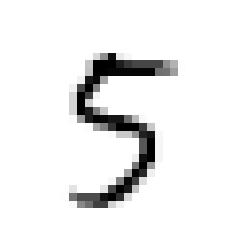

In [17]:
from  matplotlib.cm import  binary
plt.imshow(some_digit_image, cmap = binary,
           interpolation="nearest")
plt.axis("off")
plt.show()

In [18]:
digit_y_train.loc[29814]

'5'

### Let's look at a record belonging to 'NOT-5' ------------------------------------------------------------------------------------------

In [19]:
some_digit = digit_X_train.loc[28]
some_digit_image = some_digit.values.reshape(28, 28)

In [20]:
print(some_digit_image)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  12 141 225 186  13   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  61 223 254 254 254 147   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  20 140 254 254 254 254 254 252  9

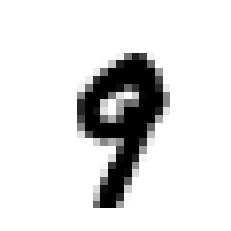

In [21]:
plt.imshow(some_digit_image, cmap = binary,
           interpolation="nearest")
plt.axis("off")
plt.show()

### Let's convert the problem into Binary-Class Classification

In [22]:
type(digit_y_train)

pandas.core.series.Series

In [23]:
digit_y_train.unique()

array(['NOT-5', '5'], dtype=object)

In [19]:
digit_y_train = digit_y_train.apply(lambda x: 1 if x == '5' else 0)

In [20]:
digit_y_train.unique()

array([0, 1], dtype=int64)

In [21]:
minMaxScaler = MinMaxScaler()

In [22]:
digit_X_train = minMaxScaler.fit_transform(digit_X_train)

In [23]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=3, loss='log')
sgd_clf.fit(digit_X_train, digit_y_train)

SGDClassifier(loss='log', random_state=3)

In [24]:
from sklearn.metrics import accuracy_score
accu_score = accuracy_score(digit_y_train, sgd_clf.predict(digit_X_train))
print(accu_score)

0.9739583333333334


#### Accuracy manual calculation - TEST set (we shouldn't touch test set until we are confident that the model will work fine)

In [25]:
digit_X_test = minMaxScaler.transform(digit_X_test)
digit_y_test = digit_y_test.apply(lambda x: 1 if x == '5' else 0)

In [26]:
accu_score = accuracy_score(digit_y_test, sgd_clf.predict(digit_X_test))
print(accu_score)

0.9709523809523809


### It looks like model working well....
  * We have got an **accuracy** of **97.5% on TRAIN**, **97.0% on TEST** set. 
  * The scores may be misleading as the dataset is **"Imbalanced Dataset"** 
  * **Accuracy is not a good Mertic**" to measure perfromance of an **"Imbalanced Dataset"** dataset.
  
  
### Confusion Matrics is better to look at clear picture of
  * How many POSITIVEs classified as POSITIVE
  * How many NEGETIVEs classified as NEGETIVE
  * How many POSITIVEs wrongly classified as NEGETIVE
  * How many NEGETIVEs wrongly classified as POSITIVE

In [27]:
from sklearn.metrics import confusion_matrix
con_mat = confusion_matrix(digit_y_train, sgd_clf.predict(digit_X_train))

In [28]:
con_mat

array([[30404,   174],
       [  701,  2321]], dtype=int64)

#### Recall is also called as "Sensitivity" or "True Positive Rate (TPR)"

In [29]:
from sklearn.metrics import precision_score, recall_score
prec_score = precision_score(digit_y_train, sgd_clf.predict(digit_X_train))
print("Precision Score : ", prec_score)
rec_score = recall_score(digit_y_train, sgd_clf.predict(digit_X_train))
print("Recall Score", rec_score)

Precision Score :  0.9302605210420841
Recall Score 0.7680344142951687


### F1 - Score:
  * F1-Score is a combination of Precision and Recall. F1-Score is a harmonic mean of precision and recall (harmonic mean gives more weight to low value). As a result, the classifier will give high F1-Score only if both Precision and Recall are high.
\begin{equation*}
F1 = \frac{2} {\frac{1} {Precision} + \frac{1} {Recall}} = \frac{TP} {TP + \frac{FN + FP} {2}}
\end{equation*}
  * F1-Score is a simple way to compare two classifiers.

In [30]:
from sklearn.metrics import f1_score
f1_score(digit_y_train, sgd_clf.predict(digit_X_train))

0.8413993112198659

### Calculating Probabilities

In [34]:
probas = sgd_clf.predict_proba(digit_X_train)
print(probas)

[[9.11604504e-01 8.83954957e-02]
 [9.82963498e-01 1.70365019e-02]
 [9.99760766e-01 2.39233658e-04]
 ...
 [6.98470503e-01 3.01529497e-01]
 [9.99999981e-01 1.92099605e-08]
 [9.92469341e-01 7.53065864e-03]]


In [38]:
np.argmax(probas, axis=1)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### Calculating Decision Scores

In [39]:
decision_scores = sgd_clf.decision_function(digit_X_train)
print(decision_scores)

[ -2.33338522  -4.05521377  -8.33783057 ...  -0.84002511 -17.7678369   -4.88121362]


### Examples on playing with threshold

#### Example1 : Precision & Recall at threshold = -14.07147103

In [41]:
prediction_at_threshold = decision_scores >= -14.07147103
print("Precision Score : ", precision_score(digit_y_train, prediction_at_threshold))
print("Recall Score : ",recall_score(digit_y_train, prediction_at_threshold))

Precision Score :  0.09566981550751284
Recall Score :  0.99867637326274


In [42]:
print(prediction_at_threshold)

[ True  True  True ...  True False  True]


In [43]:
confusion_matrix(digit_y_train, prediction_at_threshold)

array([[ 2050, 28528],
       [    4,  3018]], dtype=int64)

#### Example2 : Precision & Recall at threshold = -6.67443482

In [44]:
prediction_at_threshold = decision_scores >= -6.67443482
print("Precision Score : ", precision_score(digit_y_train, prediction_at_threshold))
print("Recall Score : ",recall_score(digit_y_train, prediction_at_threshold))

Precision Score :  0.1687869150386188
Recall Score :  0.9834546657842489


#### Example3 : Precision & Recall at threshold = -0.21305166

In [45]:
prediction_at_threshold = decision_scores >= -0.21305166
print("Precision Score : ", precision_score(digit_y_train, prediction_at_threshold))
print("Recall Score : ",recall_score(digit_y_train, prediction_at_threshold))

Precision Score :  0.9195844555598307
Recall Score :  0.7908669755129054


#### Example4 : Precision & Recall at threshold = 0.0

In [46]:
prediction_at_threshold = decision_scores >= 0.0
print("Precision Score : ", precision_score(digit_y_train, prediction_at_threshold))
print("Recall Score : ",recall_score(digit_y_train, prediction_at_threshold))

Precision Score :  0.9302605210420841
Recall Score :  0.7680344142951687


#### Example5 : Precision & Recall at threshold = 1.23014958

In [47]:
prediction_at_threshold = decision_scores >= 1.23014958
print("Precision Score : ", precision_score(digit_y_train, prediction_at_threshold))
print("Recall Score : ",recall_score(digit_y_train, prediction_at_threshold))

Precision Score :  0.9699945444626296
Recall Score :  0.5883520847121112


#### Example6 : Precision & Recall at threshold = 5.20968005

In [48]:
prediction_at_threshold = decision_scores >= 5.20968005
print("Precision Score : ", precision_score(digit_y_train, prediction_at_threshold))
print("Recall Score : ",recall_score(digit_y_train, prediction_at_threshold))

Precision Score :  0.9877675840978594
Recall Score :  0.10688285903375248


#### Example7 : Precision & Recall at threshold = 12

In [37]:
prediction_at_threshold = decision_scores >= 8
print("Precision Score : ", precision_score(digit_y_train, prediction_at_threshold))
print("Recall Score : ",recall_score(digit_y_train, prediction_at_threshold))

Precision Score :  1.0
Recall Score :  0.01158173395102581


### Precision - Recall Tread-Off Curve

In [38]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(digit_y_train, decision_scores)

In [39]:
print(precisions.shape)
print(recalls.shape)
print(thresholds.shape)

(33379,)
(33379,)
(33378,)


(array([-25., -20., -15., -10.,  -5.,   0.,   5.,  10.,  15.]),
 <a list of 9 Text xticklabel objects>)

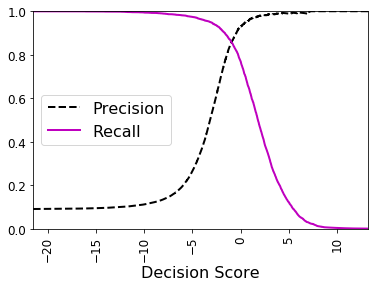

In [40]:
plt.plot(thresholds, precisions[:-1], "k--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "m-", label="Recall", linewidth=2)
plt.xlabel("Decision Score", fontsize=16)
plt.legend(loc="center left", fontsize=16)
plt.xlim([np.min(thresholds), np.max(thresholds)])
plt.ylim([0, 1])
plt.xticks(rotation=90)

In [41]:
def findThresholdForPrecision(desired_precision, decision_scores):
    best_threshold = decision_scores.min()
    best_precision = 0.0
    
    range_of_thresholds = np.linspace(decision_scores.min(), decision_scores.max(), 1000)
    
    for threshold in range_of_thresholds:
        predictions = decision_scores >= threshold
        precision_score_at_threshold = precision_score(digit_y_train, predictions)
        
        if(precision_score_at_threshold >= best_precision):
            best_threshold = threshold
            if(precision_score_at_threshold >= desired_precision):
                break;
                
    return best_threshold

In [42]:
findThresholdForPrecision(0.99, decision_scores)

4.309895883317083

In [43]:
predictions = decision_scores >= 4.309895883317083

In [44]:
precision_score(digit_y_train, predictions)

0.9923371647509579

In [45]:
recall_score(digit_y_train, predictions)

0.171409662475182

In [46]:
confusion_matrix(digit_y_train, predictions)

array([[30574,     4],
       [ 2504,   518]], dtype=int64)

### Get 99% Recall - Choose threshold

In [47]:
def findThresholdForRecall(desired_recall, decision_scores):
    best_threshold = decision_scores.max()
    best_recall = 0.0
    
    range_of_thresholds = np.linspace(decision_scores.min(), decision_scores.max(), 1000)
    range_of_thresholds = range_of_thresholds[: : -1]
    
    for threshold in range_of_thresholds:
        predictions = decision_scores >= threshold
        recall_score_at_threshold = recall_score(digit_y_train, predictions)
        
        if(recall_score_at_threshold >= best_recall):
            best_threshold = threshold
            if(recall_score_at_threshold >= desired_recall):
                break;
                
    return best_threshold

In [48]:
findThresholdForRecall(0.99, decision_scores)

-8.149159306842684

In [49]:
predictions = decision_scores >= -8.149159306842684

In [50]:
precision_score(digit_y_train, predictions)

0.13248904042864101

In [51]:
recall_score(digit_y_train, predictions)

0.9900727994705493

In [52]:
confusion_matrix(digit_y_train, predictions)

array([[10987, 19591],
       [   30,  2992]], dtype=int64)

### Other metrics Precision-Recall Curve, ROC-Curve and AUC Score

#### Precision-Recall Curve:
  * One should prefer the Precision-Recall curve whenever the positive class is rare (as in the '5', 'NOT-5' dataset)
  * Area under the curve is high, the model is working good.
  * Precision-Recall Curve is drawn for "Precision" and "Recall" scores found at different thresholds.

[0, 1, 0, 1]

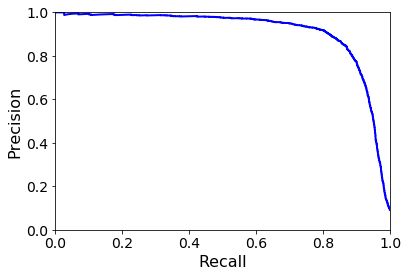

In [53]:
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.plot(recalls, precisions, "b-", linewidth=2)
plt.xlabel("Recall", fontsize=16)
plt.ylabel("Precision", fontsize=16)
plt.axis([0, 1, 0, 1])

#### ROC-Curve (Receiver Operating Characteristic curve) and AUC Score
  * ROC-Curve works similar to Accuracy score.
  * AUC Score the Area Under Curve of ROC-Curve
  
\begin{equation*}
False Positive Rate = \frac{Fasle Positives} {Fase Positive + True Negative}
\end{equation*}

\begin{equation*}
True Positive Rate (Recall) = \frac{True Positives} {True Positive + False Negative}
\end{equation*}

  * ROC curve is drawn for "False Positive Rate" and "True Positive Rate (Recall)" scores found at different thresholds.

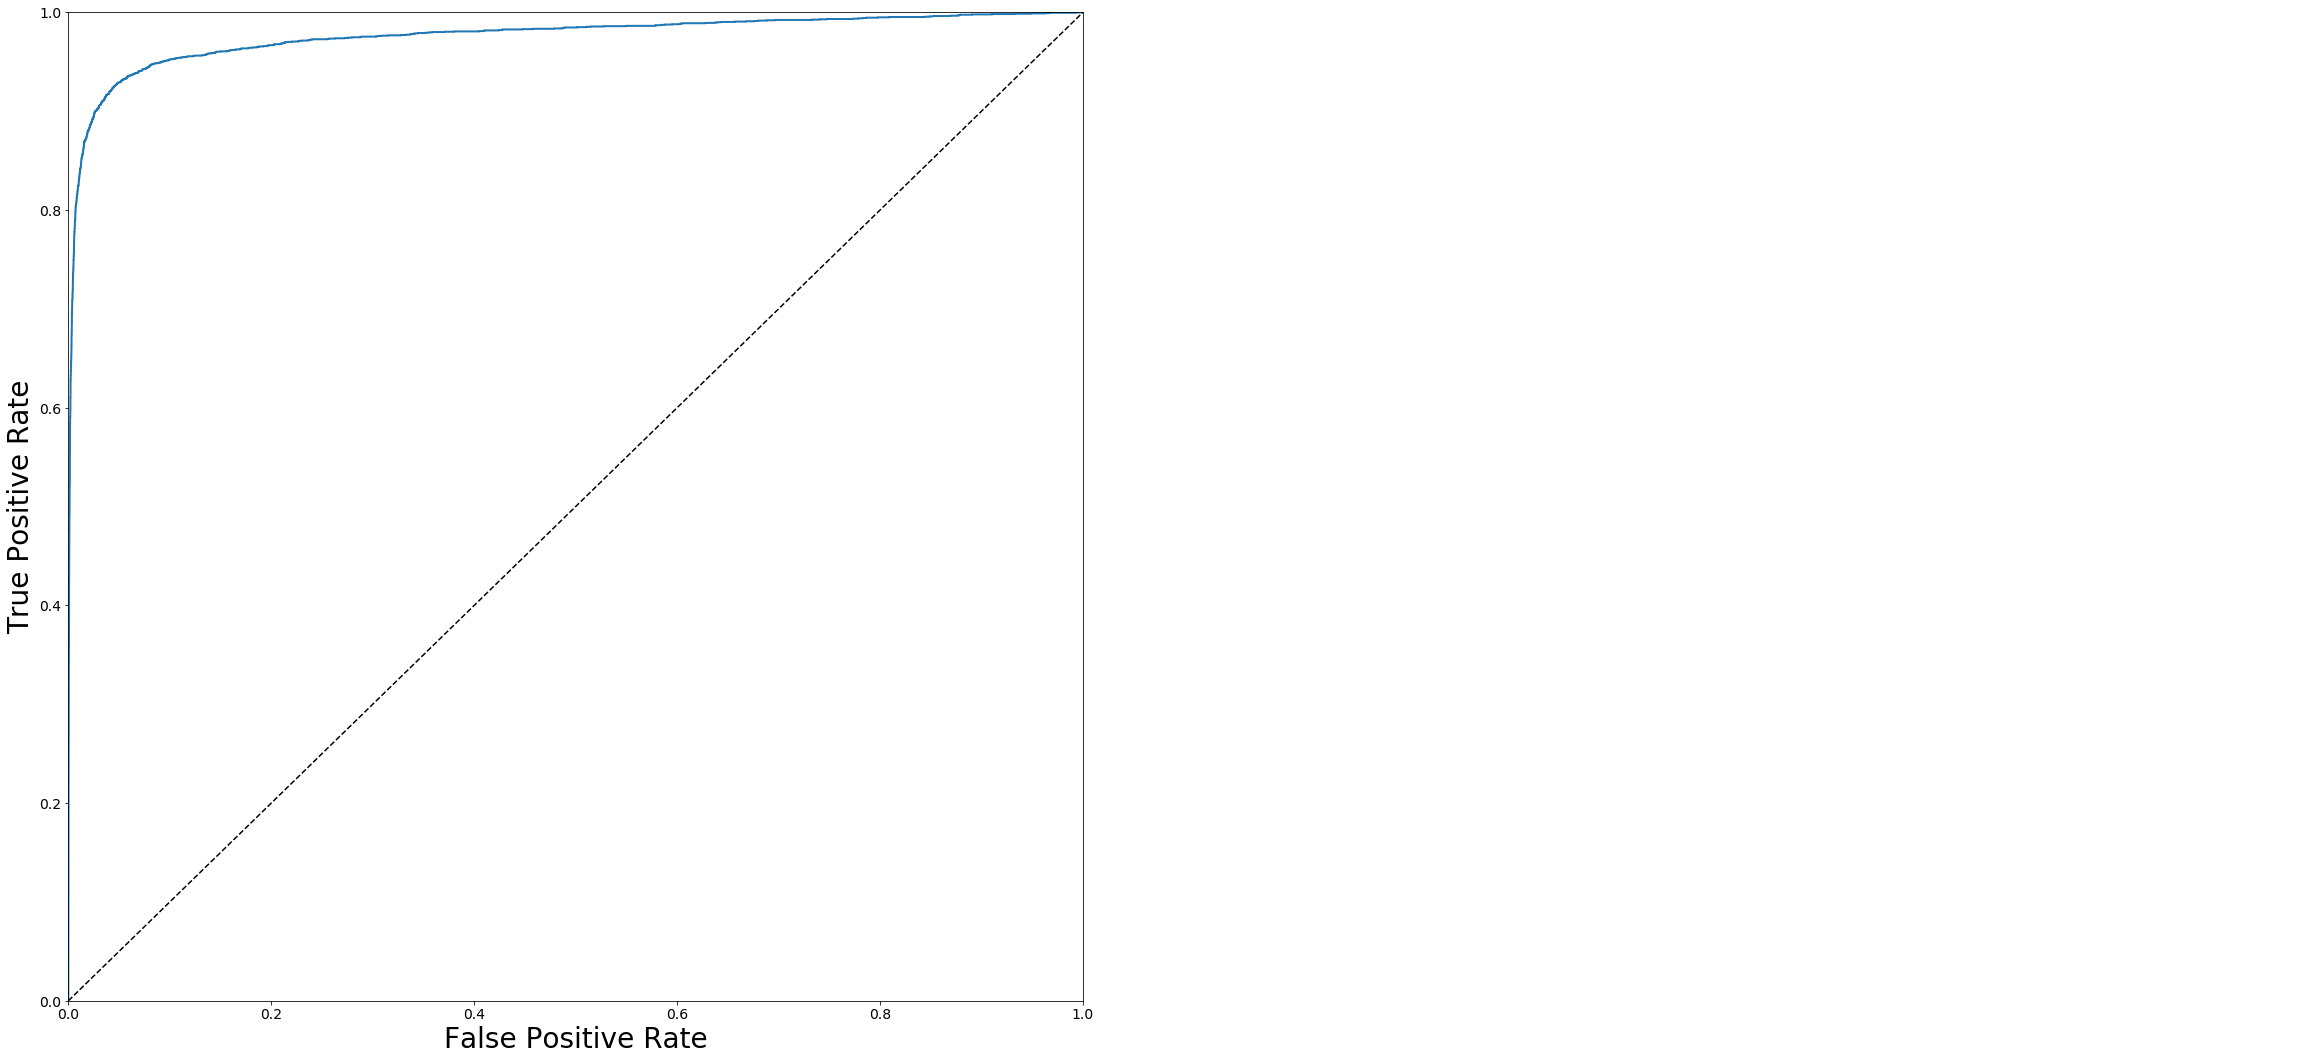

In [54]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(digit_y_train, decision_scores)

plt.figure(figsize=(40,40))
plt.subplot(2,2,1)

plt.rcParams['xtick.labelsize'] = 26
plt.rcParams['ytick.labelsize'] = 26
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=28)
plt.ylabel('True Positive Rate', fontsize=28)
plt.subplot(2,2,2)
plt.axis("off")
plt.show()

In [55]:
from sklearn.metrics import roc_auc_score

roc_auc_score(digit_y_train, decision_scores)

0.9758157296705579